In [2]:
import sherlockml.filesystem as sfs
import pandas as pd

In [3]:
# Download relevant file from SFS
filename = 'lighthouse_data.csv'
sfs.get('/input/' + filename, filename)

In [4]:
# Load data into dataframe
df = pd.read_csv(filename, header=None)
df = df.rename(columns={0: "Position"})

In [5]:
# Have a look at the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 1 columns):
Position    100000 non-null float64
dtypes: float64(1)
memory usage: 781.3 KB


## Data Intuition -- Show histogram

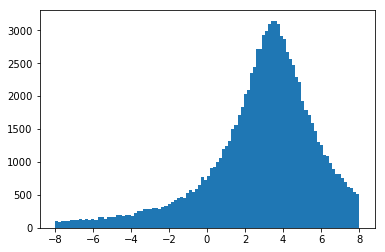

In [6]:
import matplotlib.pyplot as plt
plt.hist(df.Position,100)
plt.show()

In [7]:
print(df.Position.mean(),df.Position.median())

(2.8128119134447545, 3.250710343567264)


## Optimization function
define optimization function

In [8]:
import  scipy.optimize as op
import numpy as np

In [9]:
def f(x,y,D): # r = [x,y]
    term = y *(1.+(x - D)**2/y**2)
    return 1./np.abs(term)

In [10]:
def sum_f((x,y)):
    return -np.sum(np.log(f(x,y,df.Position)))

In [11]:
sum_f((.1,0.1))

433706.4078154937

## Find Optimization

1st with python functions 

In [12]:
op.minimize?

In [13]:
result = op.minimize(sum_f,(1,1))

In [14]:
result

      fun: 137586.90272522307
 hess_inv: array([[  8.24188344e-06,  -1.88336602e-05],
       [ -1.88336602e-05,   4.30472801e-05]])
      jac: array([-0.00976562, -0.09179688])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 374
      nit: 8
     njev: 91
   status: 2
  success: False
        x: array([ 3.37077253,  1.40089881])

In [15]:
#nll = lambda *args: f(*args)
#result = op.minimize(nll, [0, 0, np.log(f_true)], args=(x, y, yerr))

2nd contour plot the possiblity

In [16]:
x = np.linspace(-8,8,100)
y = np.linspace(0.1,12,100)
X, Y = np.meshgrid(x,y)

In [19]:
X.shape

(100, 100)

In [23]:
#Z = -np.sum(np.log(f(X[:,:,None],Y[:,:,None],df.Position[None,None,:])),axis = 2)
Z = np.zeros_like(X)
for i in range(len(x)):
    for j in range(len(y)):
        Z[i,j] = sum_f((X[i,j],Y[i,j]))

In [27]:
result.x

array([ 3.37077253,  1.40089881])

In [30]:
plt.contour(X,Y,Z,10)
plt.polt(result.x[]0,'b+')
plt.show()

SyntaxError: only named arguments may follow *expression (<ipython-input-30-3b4e6f3703d4>, line 2)